# Programming example: loading and manipulating images

## Setup

We need to load some libraries, and tell matplotlib how to behave.

In [1]:
import urllib.request
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = [15.0, 10.0]  # default is 6"x4"

We will use urllib to download an image file, cv2 (OpenCV) to open it, and matplotlib ('plt') to show it.  numpy ('np') is handy for doing math.

## Functions

In [2]:
def get_image(url):
    """Download a URL and return it as an OpenCV image."""
    response = urllib.request.urlopen(url)
    image = np.asarray(bytearray(response.read()), dtype="uint8")
    image = cv2.imdecode(image, -1)  # can do cv2.IMREAD_COLOR instead of -1
    return image

In [3]:
def show_image(image):
    """Display an OpenCV image using matplotlib."""
    if len(image.shape) == 2:  # image is grayscale
        plt.imshow(image, cmap='gray')
    else:  # need to switch from BGR to RGB
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(img)

## Download and show an image

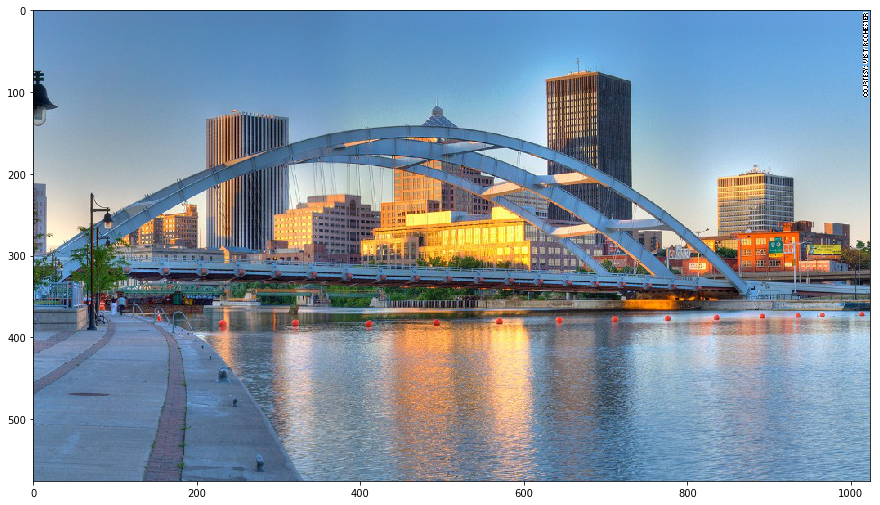

In [4]:
url_of_image = 'http://i2.cdn.turner.com/money/dam/assets/140612123345-least-stressed-cities-rochester-ny-1024x576.jpg'
#url_of_image = 'https://pbs.twimg.com/profile_images/895868552699289602/Ux7SWatQ_400x400.jpg'
image = get_image(url_of_image)
show_image(image)

## Mess with the image

First, out of curiosity, let's see how big the image is:

In [5]:
print( image.shape )

(576, 1024, 3)


Get rid of all the blue:

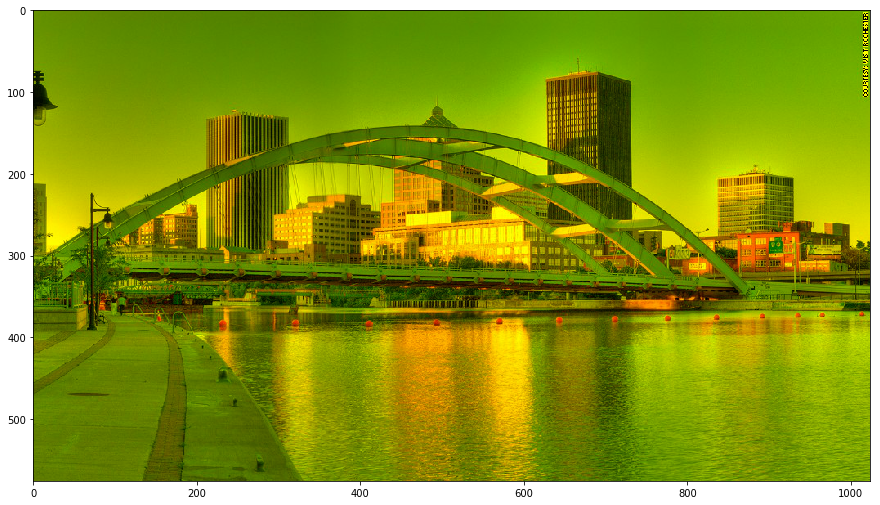

In [6]:
noblue_image = image.copy()  # make a copy, so we don't mess up the original
for row in noblue_image:
    for pixel in row:
        pixel[0] = 0  # pixel[0] is blue, pixel[1] is green, pixel[2] is red
show_image(noblue_image)

Make it black and white (well, grayscale):

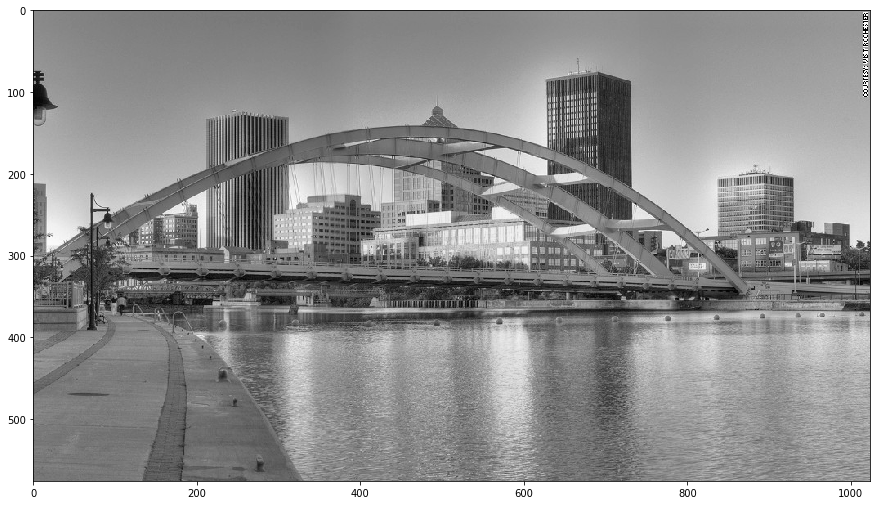

In [7]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(gray_image)

If you haven't noticed yet, the cvtColor() function converts between color spaces.

Now let's try to do something more interesting: highlight the edges of objects.

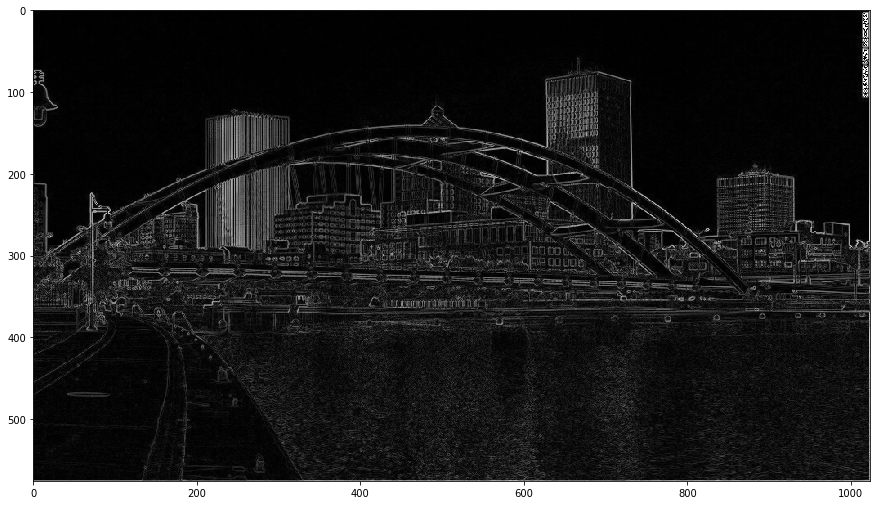

In [8]:
gray_image_copy = gray_image.copy()
for y,row in enumerate(gray_image_copy):
    for x,pixel in enumerate(row):
        if x==0 or x==gray_image_copy.shape[1]-1:  # we're on the left or right edge
            continue
        if y==0 or y==gray_image_copy.shape[0]-1:  # we're on the top or bottom edge
            continue
        left_right  = int(gray_image[y][x-1]) - int(gray_image[y][x+1])
        above_below = int(gray_image[y-1][x]) - int(gray_image[y+1][x])
        gray_image_copy[y][x] = np.sqrt(left_right**2 + above_below**2)  # pythagorean theorem anyone?
show_image(gray_image_copy)

That was a fairly clunky method, but it worked OK!

Now, let's show only the parts of the original image that were fairly strong edges:

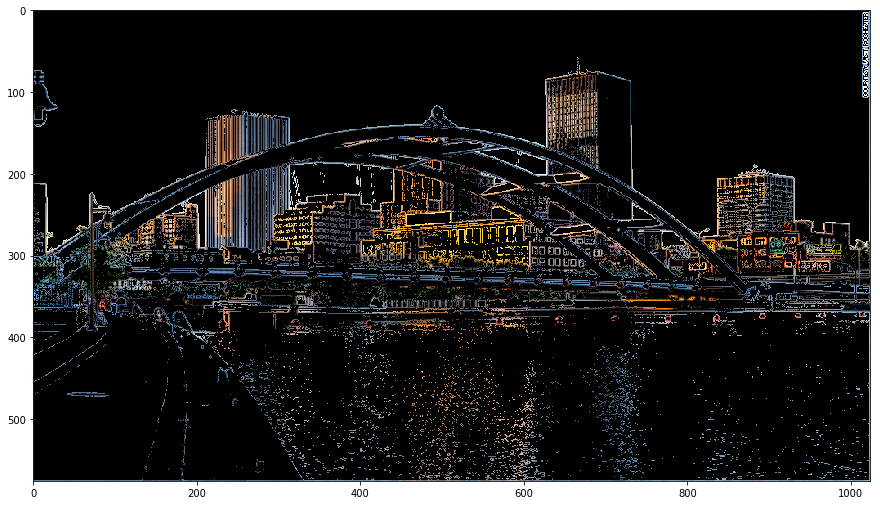

In [9]:
colored_edge_image = image.copy()
for y,row in enumerate(gray_image_copy):
    for x,pixel in enumerate(row):
        if pixel < 40:
            colored_edge_image[y][x] = [0,0,0]
show_image(colored_edge_image)

And the original, for comparison:

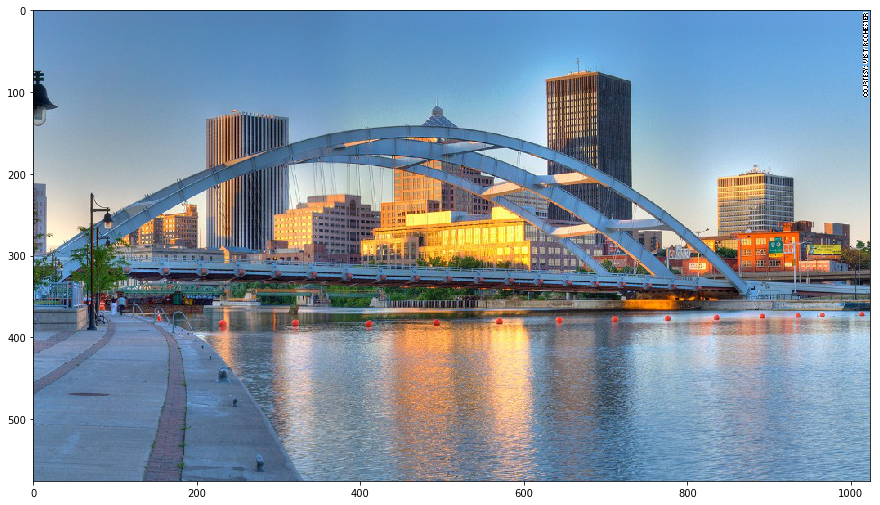

In [10]:
show_image(image)